In [1]:
# pip install pymc3 seaborn


import pymc3 as pm
import numpy as np
import seaborn as sns
import arviz as az

Following:

Müller, J.W., 1973. Dead-time problems. Nuclear Instruments and Methods, 112(1-2), pp.47-57.

$\nu_{sup} = \nu_1 + \nu_2 - 2\tau \nu_1 \nu_2$

$\nu_1 + \nu_2 - \nu_{sup} = 2\tau  \nu_1 \nu_2$

$ \tau = \frac{\nu_1 + \nu_2 - \nu_{sup}}{2 \nu_1 \nu_2}$

In [2]:
with pm.Model() as model:
    r1 = pm.HalfFlat('r1')
    nu1 = pm.Poisson('nu1', r1, observed=19999.927516)
    r2 = pm.HalfFlat('r2')
    nu2 = pm.Poisson('nu2', r2, observed=20544.593987)
    rsup = pm.HalfFlat('rsup')
    nusup = pm.Poisson('nusup', rsup, observed=39543.032686)
    tau = pm.Deterministic('tau', (r1+r2-rsup)/(2*r1*r2))
    trace = pm.sample(10000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [rsup, r2, r1]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 18 seconds.


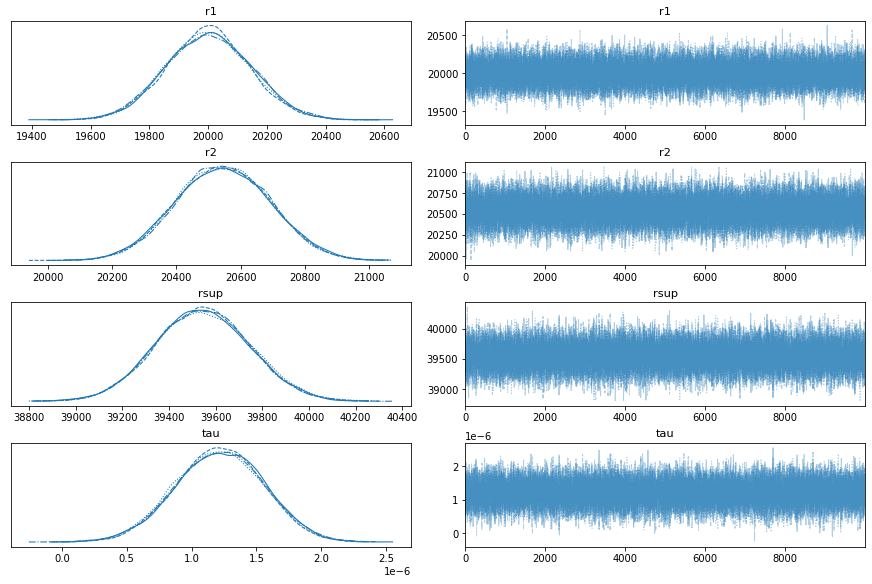

In [3]:
pm.plot_trace(trace);

In [4]:
pm.summary(trace, round_to='none')

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
r1,20000.344032,1.427863e+02,1.973020e+04,20264.134898,6.321702e-01,4.471538e-01,51054.744627,29290.861669,1.000595
r2,20545.514982,1.458633e+02,2.026383e+04,20807.772677,6.404414e-01,4.529944e-01,51867.043714,29734.765347,1.000234
rsup,39545.427443,2.012093e+02,3.918265e+04,39937.541469,8.977798e-01,6.349847e-01,50261.820679,30512.933900,1.000176
tau,0.000001,3.393347e-07,5.630267e-07,0.000002,1.510500e-09,1.099618e-09,50391.756102,29454.757219,1.000221


In [5]:
tau = trace['posterior']['tau'].data.flatten()

<AxesSubplot:ylabel='Count'>

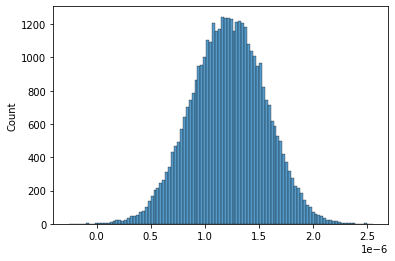

In [6]:
sns.histplot(tau)

In [7]:
hdi = az.hdi(tau, hdi_prob=.94) # this is in the summary
hdi

array([5.63026659e-07, 1.83241521e-06])

In [8]:
print(f'So for this case the Dead Time calculation is {1e6*hdi[0]:.2f} -- {1e6*hdi[1]:.2f} us')

So for this case the Dead Time calculation is 0.56 -- 1.83 us
